The goal of this project is to determine the expected number of double birthdays and triple birthdays for a group of people of any given size. As far as I know, these expected values cannot be calculated analytically, so I'll rely on Monte Carlo simulation to get the estimates. The one thing that I know can be calculated exactly is the probability of at least one double birthday given any number of people, so we can validate the simulation by comparing that estimate with the theory.

In [2]:
#Map days of the year to dates.
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Feb']
month_lengths = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 1]
cumulative = [sum(month_lengths[:i]) for i in range(0, len(month_lengths))]
dates = [0]*366
for i in range(len(dates)):
    month = 'NULL'
    day_of_month = 0
    for month_i in range(len(cumulative)):
        num = cumulative[month_i]
        if i >= num:
            month =  month_names[month_i]
            day_of_month = i - num + 1
    if i >= cumulative[-1]:
        month = month_names[-1]
        day_of_month = 29
    dates[i] = month + ' ' + str(day_of_month)
    #print(month, day_of_month)
#print(dates)

In [3]:
import random

def N_random_birthdays(N_people = 10):
    birthdays_hist = [0]*366 #366 days including Feb. 29th which is 4 times less likely than any other day.
    #We implement this by selecting a random integer between 0 and 365*4+1 = 1461.
    #We then take int(number/4) to get the day of the year (between 0 and 365
    #where 0 is Jan 1, 364 is Dec 31, and 365 is Feb 29).

    #Loop through the people and give each one a random birthday.
    for i in range(N_people):
        rand_num = random.randint(0,1461)
        birthday = int(rand_num / 4.0)
        birthdays_hist[birthday] += 1
        #print(dates[birthday])
    
    return birthdays_hist    

<BarContainer object of 366 artists>

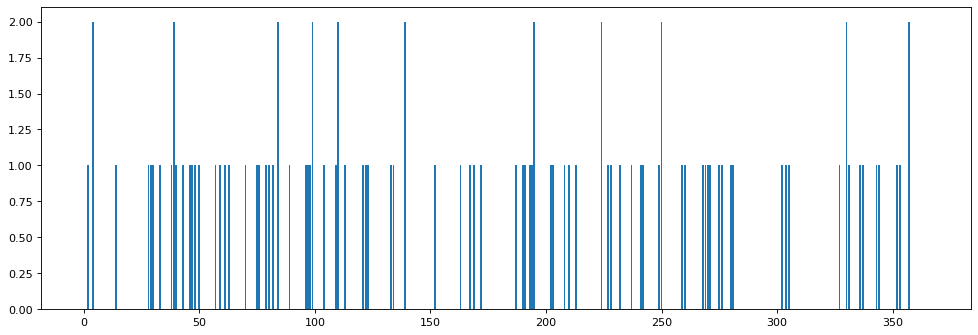

In [4]:
import matplotlib.pyplot as plt
birthdays_hist = N_random_birthdays(N_people = 100)
plt.figure(figsize=(15, 5), dpi=80)
plt.bar(range(366), birthdays_hist)

In [5]:
#The number of double birthdays is the number of days which are a birthday for at least two people.
#It is not the number of pairs of people who share birthdays. Therefore it has a maximum of 366.
def run_sims(N_trials=10, N_people=10):
    double_bdays = [0]*N_trials
    triple_bdays = [0]*N_trials
    for i in range(N_trials):
        birthdays_hist = N_random_birthdays(N_people)
        for bday in birthdays_hist:
            if bday >= 2:
                double_bdays[i] += 1
            if bday >= 3:
                triple_bdays[i] += 1
    
    return double_bdays, triple_bdays

In [6]:
def prob_of_n_bday(double_bdays = [0,0,0]):
    count = 0
    for bday in double_bdays:
        if bday > 0:
            count += 1
    prob = count / len(double_bdays)
    return prob

doubles, triples = run_sims(100, 10)
print(doubles)
print('probability = %.5f' % prob_of_n_bday(doubles))
print(triples)
print('probability = %.5f' % prob_of_n_bday(triples))

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
probability = 0.13000
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
probability = 0.00000


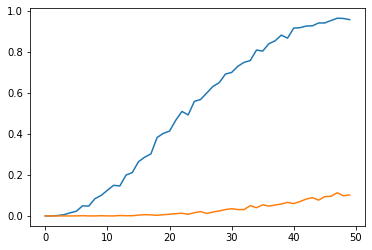

In [7]:
def prob_vs_N_people(N_max = 20, N_trials = 100):
    prob_doubles = [0]*N_max
    prob_triples = [0]*N_max
    for n in range(1, N_max):
        doubles, triples = run_sims(N_trials, n)
        prob_doubles[n] = prob_of_n_bday(doubles)
        prob_triples[n] = prob_of_n_bday(triples)
    return prob_doubles, prob_triples

probs_2, probs_3 = prob_vs_N_people(50, 1000)        
plt.plot(range(len(probs_2)), probs_2)
plt.plot(range(len(probs_3)), probs_3)
plt.show()

0.41143838358058016
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


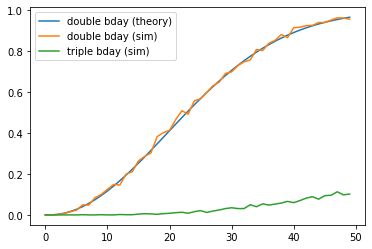

In [8]:
#Let's compare the simulation with the theoretical calculation for the probability of a double birthday.
def prob_double_bday(n = 10):
    #probabiliy = 1 minus the probability of n distinct birthdays
    prob_n_distinct = 1
    for i in range(n):
        prob_n_distinct = prob_n_distinct * (365-i) / 365.0
    prob = 1 - prob_n_distinct
    return prob

print(prob_double_bday(20))

x = list(range(50))
print(x)
probs_vs_x = []
for n in x:
    probs_vs_x.append(prob_double_bday(n))
plt.plot(x, probs_vs_x)
plt.plot(range(len(probs_2)), probs_2)
plt.plot(range(len(probs_3)), probs_3)
plt.legend(["double bday (theory)", "double bday (sim)", "triple bday (sim)"])

I want to make another plot like this that shows the expected number of double birthdays along with a 95% confidence interval. For each number x, I'll need to have an ordered list of the number of double birthdays from each simulation so I can pick the upper 2.5% cutoff and the lower 2.5% cutoff.

In [10]:
def get_double_bdays_distribution(N_people = 20, N_trials = 100):
    doubles, triples = run_sims(N_trials, N_people)
    doubles_sorted = sorted(doubles)
    triples_sorted = sorted(triples)
    return doubles_sorted, triples_sorted

doubles_dist, triples_dist = get_double_bdays_distribution(50, 100)
print(doubles_dist)
print(triples_dist)

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [41]:
def get_confidence_interval(sorted_list, level = 0.95):
    N_points = len(sorted_list)
    tail_portion = ( 1 - level ) / 2.0
    cutoff_index = int(tail_portion * N_points)
    lower = ( sorted_list[cutoff_index] + sorted_list[cutoff_index+1] ) / 2.0
    upper = ( sorted_list[N_points-cutoff_index-1] + sorted_list[N_points-cutoff_index-2] ) / 2.0
    mean = sum(sorted_list) / N_points
    if upper < mean:
        upper = mean
    if lower > mean:
        lower = mean
    return mean, upper, lower

expected, upperlim, lowerlim = get_confidence_interval(doubles_dist)
print(expected)
print(upperlim)
print(lowerlim)

3.21
6.5
1.0


In [56]:
def expected_range_vs_N_people(N_max = 50, N_trials = 100):
    expected_doubles = []
    expected_triples = []
    for n in range(1, N_max):
        doubles_sorted, triples_sorted = get_double_bdays_distribution(n, N_trials)
        expected_doubles.append(get_confidence_interval(doubles_sorted))
        expected_triples.append(get_confidence_interval(triples_sorted))
    return expected_doubles, expected_triples

expected_double_bdays, expected_triple_bdays = expected_range_vs_N_people(100, 10000)        
#print(expected_double_bdays)

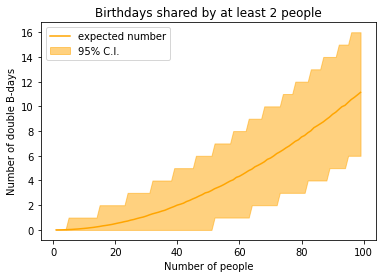

In [57]:
mean_double_bdays = [item[0] for item in expected_double_bdays]
upper_double_bdays = [item[1] for item in expected_double_bdays]
lower_double_bdays = [item[2] for item in expected_double_bdays]
plt.fill_between(range(1, len(upper_double_bdays)+1), upper_double_bdays, lower_double_bdays, color='orange', alpha=0.5)
plt.plot(range(1, len(mean_double_bdays)+1), mean_double_bdays, color='orange')
plt.title("Birthdays shared by at least 2 people")
plt.xlabel("Number of people")
plt.ylabel("Number of double B-days")
plt.legend(["expected number", "95% C.I."], loc = 'upper left')
plt.show()

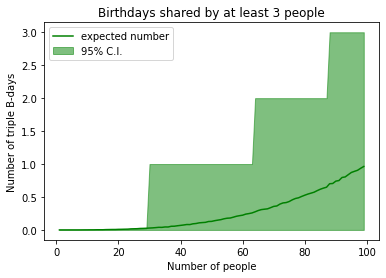

In [58]:
mean_triple_bdays = [item[0] for item in expected_triple_bdays]
upper_triple_bdays = [item[1] for item in expected_triple_bdays]
lower_triple_bdays = [item[2] for item in expected_triple_bdays]
plt.fill_between(range(1, len(upper_triple_bdays)+1), upper_triple_bdays, lower_triple_bdays, color='green', alpha=0.5)
plt.plot(range(1, len(mean_triple_bdays)+1), mean_triple_bdays, color='green')
plt.title("Birthdays shared by at least 3 people")
plt.xlabel("Number of people")
plt.ylabel("Number of triple B-days")
plt.legend(["expected number", "95% C.I."], loc = 'upper left')
plt.show()

In [60]:
real_bdays = [
    0,0,0,0,0,0,0,0,0,0,
    1,1,1,1,2,2,2,2,2,2,
    2,2,2,2,2,2,2,2,2,2,
    3,3,3,3,3,3,3,3,3,3,
    3,3,3,3,3,3,3,3,3,3,
    3,3,3,3,3,3,3,4,4,5,
    5,5,5,5,5,6,6,6,6,6,
    6,7,7,7,7,7,7
             ]

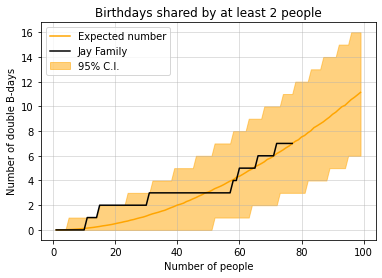

In [70]:
plt.fill_between(range(1, len(upper_double_bdays)+1), upper_double_bdays, lower_double_bdays, color='orange', alpha=0.5)
plt.grid(alpha=0.5)
plt.plot(range(1, len(mean_double_bdays)+1), mean_double_bdays, color='orange')
plt.plot(range(1, len(real_bdays)+1), real_bdays, color='black')
plt.title("Birthdays shared by at least 2 people")
plt.xlabel("Number of people")
plt.ylabel("Number of double B-days")
plt.legend(["Expected number", "Jay Family", "95% C.I."], loc = 'upper left')
plt.show()